<a href="https://colab.research.google.com/github/cokemhlee/Lecture-DeepLearning/blob/main/Admission_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
# Data Loading
path = '/content/'
data = pd.read_csv(path+'Admission.csv')


In [ ]:
# Simple EDA
data.shape
data.head()

,GRE Score,TOEFL Score,CGPA,University Rating,Chance of Admit
0,337,118,9.65,4,0.92
1,324,107,8.87,4,0.76
2,316,104,8.00,3,0.72
3,322,110,8.67,3,0.80
4,314,103,8.21,2,0.65


In [ ]:
# Separation of features and target
x = data.iloc[:,0:-1]
y = data.iloc[:,-1]

In [ ]:
x

,GRE Score,TOEFL Score,CGPA,University Rating
0,337,118,9.65,4
1,324,107,8.87,4
2,316,104,8.00,3
3,322,110,8.67,3
4,314,103,8.21,2
...,...,...,...,...
495,332,108,9.02,5
496,337,117,9.87,5
497,330,120,9.56,5
498,312,103,8.43,4


In [ ]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [ ]:
# Separation of train set and test set
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,random_state=108)
train_x.shape,train_y.shape,test_x.shape,test_y.shape

((400, 4), (400,), (100, 4), (100,))

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# model define

model = Sequential()
    
model.add(Dense(4,activation='relu',input_dim=4))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='linear')) #as this is Regression problem

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# hyperparameter setting
model.compile(loss='mean_squared_error',optimizer='Adam') #as this is Regression problem

In [ ]:
# train
hist = model.fit(train_x,train_y,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 1s 27ms/step - loss: 0.5270 - val_loss: 0.5111
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5129 - val_loss: 0.4973
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 0.4990 - val_loss: 0.4837
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 0.4855 - val_loss: 0.4703
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 0.4722 - val_loss: 0.4572
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.4591 - val_loss: 0.4444
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 0.4463 - val_loss: 0.4319
Epoch 8/100
10/10 [==============================] - 0s 6ms/step - loss: 0.4339 - val_loss: 0.4197
Epoch 9/100
10/10 [==============================] - 0s 5ms/step - loss: 0.4217 - val_loss: 0.4077
Epoch 10/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4098 - val_loss: 0.3960
Epoch 11

In [ ]:
import matplotlib.pyplot as plt

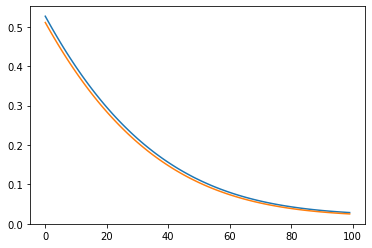

In [ ]:
#plotting training and validation loss

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()

In [ ]:
# inference
y_pred = model.predict([[320,120,9.5,4]])

In [ ]:
print(y_pred)

[[0.63090557]]
